In [2]:
import seaborn as sns
import pandas as pd
import zipfile
import numpy as np

import datetime

## Downloading the data

In [9]:
CPB = pd.read_csv("C:/Users/Windows 10/Desktop/data/CPB.csv")
GPC = pd.read_csv("C:/Users/Windows 10/Desktop/data/GPC.csv")
MTB = pd.read_csv("C:/Users/Windows 10/Desktop/data/MTB.csv")
SYY = pd.read_csv("C:/Users/Windows 10/Desktop/data/SYY.csv")

## Part 1 

1. Is there a company that has no difference between the High and Low columns?
What does it mean for the stock's trading behavior on such days?
2. (1pt task) "What is the highest and lowest price (High) each company recorded?"
3. (1pt task) Calculate logarithmic returns from Close. For each company report on
its, min, max, mean, standard deviation, and skewness of the return distribution.
4. When did each company record the second highest gain and second highest
loss for the day? (logarithmic loss). Hint: idxmax
5. What is the median calendar weekly volume for each company? Hint: check how
to resample pandas DF
6. Which company recorded the lowest total return over the whole period?
7. Create a new column volume_class based on the volume column into
categories (e.g., "Low", "Medium", "High") and use tertile thresholds for the
classes.
8. A. Plot the log-returns of the companies (ideally in the same plot).
B. Show the log-return distribution of the companies (ideally in the same plot).

In [10]:
companies_list =[CPB, GPC, MTB, SYY]
companies_names = ['CPB', 'GPC', 'MTB', 'SYY']

In [14]:
(CPB['High'] - CPB['Low']).mean()

0.8295867549668874

In [18]:
k=0
for company in companies_list:
    high = company['High']
    low = company['Low']
    avg_difference = (high-low).mean()
    print(f'This is the average difference for {companies_names[k]}: {avg_difference}')
    k+=1

This is the average difference for CPB: 0.8295867549668874
This is the average difference for GPC: 1.881153642384106
This is the average difference for MTB: 3.1544483443708606
This is the average difference for SYY: 1.3133410596026491


In [ ]:
# Ex 2

In [21]:
k=0

for company in companies_list:
    max = company['High'].max()
    min = company['Low'].min()
    avg_difference = (high-low).mean()
    print(f'For {companies_names[k]} the max value is {max}, and the min value is {min}')
    k+=1

For CPB the max value is 54.238, and the min value is 26.439
For GPC the max value is 179.245, and the min value is 43.95
For MTB the max value is 179.032, and the min value is 73.066
For SYY the max value is 85.643, and the min value is 22.88


In [22]:
# Ex 3

In [170]:
k=0

for company in companies_list:
    lrets = np.log(company['Close']/company['Close'].shift(1))
    lrets_min = lrets.min().round(5)
    lrets_max = lrets.max().round(5)
    lrets_mean = lrets.mean().round(5)
    # lrets_sd = 
    print(f'For {companies_names[k]}. Min lret:{lrets_min}, Max lret: {lrets_max}, Mean: {lrets_mean}, SD: {}')
    k+=1

For CPB. Min lret:-0.13198, Max lret: 0.0963, Mean: 8e-05
For GPC. Min lret:-0.15003, Max lret: 0.18996, Mean: 0.00051
For MTB. Min lret:-0.14953, Max lret: 0.2239, Mean: 5e-05
For SYY. Min lret:-0.23706, Max lret: 0.1722, Mean: 0.00032


In [ ]:
# Ex 4
# When did each company record the second highest gain and second highest loss for the day? (logarithmic loss). Hint: idxmax

In [171]:
for company in companies_list:
    lrets = np.log(company['Close']/company['Close'].shift(1))

In [172]:
np.log(SYY['Close']/SYY['Close'].shift(1)).sort_values()

802   -0.237061
804   -0.220636
801   -0.123818
806   -0.115375
464   -0.099155
         ...   
970    0.155221
811    0.157967
812    0.158296
807    0.172201
0           NaN
Name: Close, Length: 1510, dtype: float64

In [173]:
# Ex 5 
# What is the median calendar weekly volume for each company? Hint: check how to resample pandas DF

In [197]:
companies_names

['CPB', 'GPC', 'MTB', 'SYY']

In [200]:
SYY['Date'] = pd.to_datetime(SYY['Date'])

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-01-03,45.160,45.429,44.458,44.899,3877000,0.00,0.0
2017-01-04,44.940,45.441,44.940,45.309,2986700,0.33,0.0
2017-01-05,45.087,45.416,45.087,45.161,3629400,0.00,0.0
2017-01-06,45.055,45.712,44.981,45.482,4776500,0.00,0.0
2017-01-09,45.580,45.950,45.547,45.728,3933300,0.00,0.0
...,...,...,...,...,...,...,...
2022-12-23,73.061,74.017,72.824,73.970,1094600,0.00,0.0
2022-12-27,74.084,74.264,73.099,73.856,2213800,0.00,0.0
2022-12-28,74.103,74.235,72.691,72.928,2655600,0.00,0.0


In [198]:
SYY.set_index("date", inplace=True)
weekly_df = df.resample("W").sum()
weekly_df['Volume']

NameError: name 'df' is not defined

In [193]:
SYY.set_index("Date", inplace=True)


In [194]:
SYY.resample("W").sum()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-01-08,180.242,181.998,179.466,180.851,15269600,0.33,0.0
2017-01-15,226.957,227.844,225.857,226.809,13889200,0.00,0.0
2017-01-22,179.751,180.711,177.845,178.674,16316000,0.00,0.0
2017-01-29,219.599,220.099,217.726,218.309,16117100,0.00,0.0
2017-02-05,215.713,216.879,214.589,215.312,20644200,0.00,0.0
...,...,...,...,...,...,...,...
2022-12-04,406.187,409.540,402.643,406.272,10603000,0.00,0.0
2022-12-11,399.793,401.536,395.748,397.577,7323500,0.00,0.0
2022-12-18,385.490,388.293,379.067,383.395,14398100,0.00,0.0


In [44]:
# Ex 6 
# Which company recorded the lowest total return over the whole period?

In [64]:
total_returns_list = []

for company in companies_list:
    initial_value = company.iloc[0]['Close']
    final_value = company.iloc[-1]['Close']
    total_return = (final_value - initial_value)/initial_value
    total_returns_list.append(total_return)

In [177]:
lowest_return = np.min(total_returns_list)

In [72]:
total_returns_list

[0.12969992577669387,
 1.1615693744944027,
 0.0842506925097191,
 0.6128867012628344]

In [179]:
print(f'{companies_names[2]} has recorded the lowest total return: {lowest_return}')

MTB has recorded the lowest total return: 0.0842506925097191


In [ ]:
# Ex 7 
# Create a new column volume_class based on the volume column into categories (e.g., "Low", "Medium", "High") and use tertile thresholds for the classes.

In [180]:
np.percentile(SYY['Volume'], (30, 60))

array([2005640., 2708040.])

In [181]:
for company in companies_list:
    volume_tertiles = np.percentile(company['Volume'], (33, 66))
    company['Volume']
    print(volume_tertiles)

[1787867. 2589322.]
[623379. 854994.]
[677397. 965598.]
[2066391. 2879872.]


In [182]:
SYY['Volume'] <= np.percentile(SYY['Volume'], (33, 66))[0]

0       False
1       False
2       False
3       False
4       False
        ...  
1505     True
1506    False
1507    False
1508     True
1509     True
Name: Volume, Length: 1510, dtype: bool

In [ ]:
# Ex 8 
# A. Plot the log-returns of the companies (ideally in the same plot). B. Show the log-return distribution of the companies (ideally in the same plot).

In [89]:
all_log_returns = []

for company in companies_list:
    lrets = np.log(company['Close']/company['Close'].shift(1))
    all_log_returns.append(lrets)

In [98]:
companies_names

['CPB', 'GPC', 'MTB', 'SYY']

In [101]:
lrets_df = pd.DataFrame({'CPB': all_log_returns[0], 'GPC': all_log_returns[1], 'MTB': all_log_returns[2], 'SYY': all_log_returns[3]})

<Axes: >

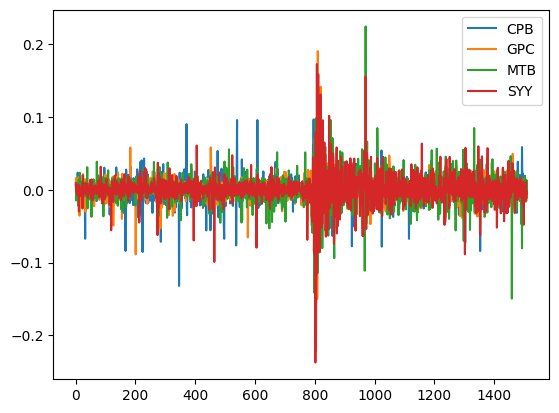

In [105]:
lrets_df.plot()

array([[<Axes: title={'center': 'CPB'}>, <Axes: title={'center': 'GPC'}>],
       [<Axes: title={'center': 'MTB'}>, <Axes: title={'center': 'SYY'}>]],
      dtype=object)

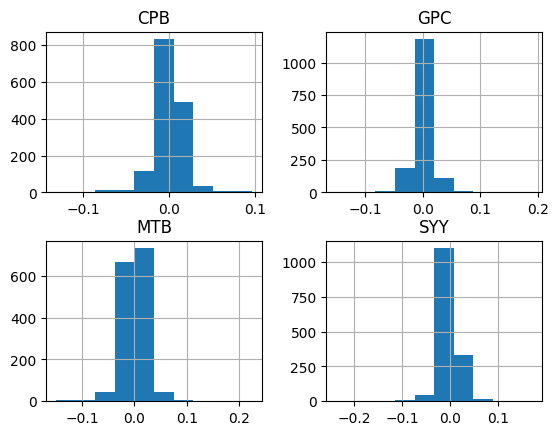

In [106]:
lrets_df.hist()

Perhaps a bit more refined plots:

# Part 2

In [111]:
url = "https://ies-fsv.s3.eu-central-1.amazonaws.com/companies/companies_no_subindustry.csv"
df2 = pd.read_csv(url)

In [112]:
df2

,Symbol,Security,GICS_Sector,hq,included,Founded
0,MMM,3M,Industrials,"Saint Paul, Minnesota",09.08.1976,1902
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",26.07.2017,1916
2,ABT,Abbott,Health Care,"North Chicago, Illinois",31.03.1964,1888
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,2013 (1888)
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",31.05.2018,1981
...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,"Louisville, Kentucky",06.10.1997,1997
499,ZBRA,Zebra Technologies,Information Technology,"Lincolnshire, Illinois",23.12.2019,1969
500,ZBH,Zimmer Biomet,Health Care,"Warsaw, Indiana",07.08.2001,1927
501,ZION,Zions Bancorporation,Financials,"Salt Lake City, Utah",22.06.2001,1873


1. (1pt task) Find out how many companies do not filled-in the date of inclusion
(column “included”) to S&P 500.
2. Delete the companies with no inclusion date and calculate which company is
the oldest/youngest constituent and tell us the median age of a constituent in
the sample. If you need to fix anything or make any assumptions, comment on
them in the code.
Hint: pd.to_datetime (some date column, dayfirst=True, errors='coerce')
3. Describe the distribution of companies across sectors and create a plot that
demonstrates the proportionality of the sectors (i.e. pie plot, or something like
this)
4. Parse the “hq” column, extract the state of the hq and describe the distribution
of the states

5. Join the dataset with this one: https://ies-fsv.s3.eu-central-
1.amazonaws.com/companies/companies_subindustry.csv

And join the two datasets based on an appropriate key. Report on distribution of
subindustries for the “Health Care” GICS sector.

In [119]:
df2['included'].isna().any()

True

In [129]:
df2_missing_date = df2[df2['included'].isnull()]

In [140]:
df2_missing_date['Symbol'].unique()

array(['AMD', 'ED', 'GLW', 'DHR', 'DRI', 'D', 'ETN', 'FITB', 'FE', 'BEN',
       'FCX', 'GE', 'HUM', 'HBAN', 'KLAC', 'L', 'MAR', 'MCK', 'MET',
       'MCO', 'MS', 'MSI', 'NI', 'NTRS', 'OMC', 'PARA', 'PAYX', 'PNW',
       'PPL', 'QCOM', 'RTX', 'ROK', 'SPGI', 'SRE', 'STT', 'TROW', 'TPR',
       'TXN', 'USB', 'VLO', 'WM', 'WAT', 'WRK', 'WY', 'WHR'], dtype=object)

In [142]:
industries_to_drop = ['AMD', 'ED', 'GLW', 'DHR', 'DRI', 'D', 'ETN', 'FITB', 'FE', 'BEN',
       'FCX', 'GE', 'HUM', 'HBAN', 'KLAC', 'L', 'MAR', 'MCK', 'MET',
       'MCO', 'MS', 'MSI', 'NI', 'NTRS', 'OMC', 'PARA', 'PAYX', 'PNW',
       'PPL', 'QCOM', 'RTX', 'ROK', 'SPGI', 'SRE', 'STT', 'TROW', 'TPR',
       'TXN', 'USB', 'VLO', 'WM', 'WAT', 'WRK', 'WY', 'WHR']

In [144]:
df2['Symbol'] in industries_to_drop

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [146]:
df2['Symbol'] is in industries_to_drop

SyntaxError: invalid syntax (340417165.py, line 1)

In [ ]:
df2.drop(df2[df2['city'] == 'Chicago'].index)

In [ ]:
df2.drop

In [151]:
df2['Symbol']

0       MMM
1       AOS
2       ABT
3      ABBV
4      ABMD
       ... 
498     YUM
499    ZBRA
500     ZBH
501    ZION
502     ZTS
Name: Symbol, Length: 503, dtype: object

## Part 3

1. (1pt task) Generate four random variables from four different distributions
(e.g. Normal, Uniform, etc.) each containing random number of observations
between 100 and 500.
2. (1pt task) Draw a figure with a matrix of plots where you show something
about the random variables (e.g. pdf, cdf, histogram, boxplot, etc.).

In [159]:
np.random.uniform(100, 500, 4) #uniform distribution

array([435.83191347, 467.83610198, 214.60064401, 290.47876674])

In [190]:
np.random.standard_t(4,4)

array([-0.53245325, -0.53241424, -1.08867489, -0.90109375])

In [188]:
np.random.poisson(100, 4)

array([100, 113, 100, 101])